In [1]:
import math

In [4]:
def f(w):
    return 4 + 1/(w*354j/1000000) + w*19j/1000


In [6]:
220 / f(50 * 2 * math.pi)

(35.00788960876481+26.455275345809596j)

In [7]:
import cmath

In [9]:
def get_cos(z_complex, f=220):
    """
    将复数电流/电压转换为余弦函数的参数 A, w, phi
    i(t) = A * cos(w*t + phi)

    :param z_complex: 复数 (a + bj)
    :param f: 频率 (Hz)，默认 220Hz
    :return: A (峰值), w (角频率), phi (相位弧度)
    """
    # 1. 计算角频率 w = 2 * pi * f
    w = 2 * math.pi * f

    # 2. 获取复数的模长 (有效值 RMS)
    rms_value = abs(z_complex)

    # 3. 转换为峰值 A (Amplitude)
    A = rms_value * math.sqrt(2)

    # 4. 获取相位 phi (使用 cmath.phase 自动处理象限)
    phi = cmath.phase(z_complex)

    return A, w, phi


# --- 测试你的数据 ---
I_complex = 35.00788960876481 + 26.455275345809596j

A, w, phi = get_cos(I_complex, f=50)

print(f"峰值 A   = {A:.4f}")
print(f"角频率 w = {w:.4f}")
print(f"相位 phi = {phi:.4f} rad (约 {math.degrees(phi):.2f}°)")

峰值 A   = 62.0554
角频率 w = 314.1593
相位 phi = 0.6471 rad (约 37.08°)


In [10]:
62 / math.sqrt(2)

43.840620433565945

In [14]:
 f(100 * 2 * math.pi)

(4+7.442149736412532j)

In [13]:
A, w, phi = get_cos(220 / f(100 * 2 * math.pi), f = 100)
print(f"A = {A}, w = {w}, phi = {phi}, deg = {math.degrees(phi)}")
print("有效值 =", A / math.sqrt(2))

A = 36.82412141214548, w = 628.3185307179587, phi = -1.0776168793265775, deg = -61.742899117471424
有效值 = 26.038585961764813


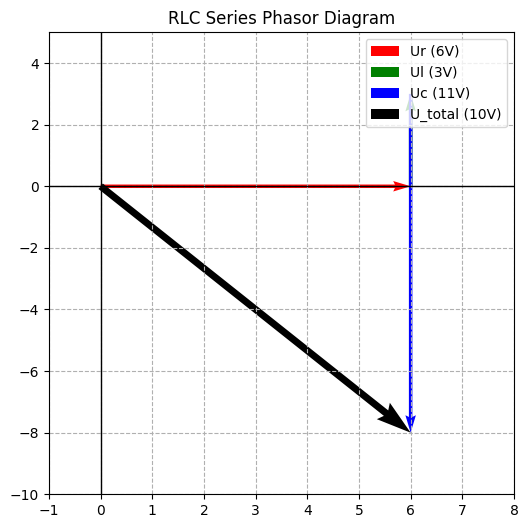

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 定义电压向量 (实部, 虚部)
Ur = 6 + 0j
Ul = 0 + 3j
Uc = 0 - 11j
U_total = Ur + Ul + Uc

# 绘图设置
plt.figure(figsize=(6, 6))
ax = plt.gca()

# 画出各个相量 (起点x, 起点y, 长度dx, 长度dy)
ax.quiver(
    0,
    0,
    Ur.real,
    Ur.imag,
    angles="xy",
    scale_units="xy",
    scale=1,
    color="r",
    label="Ur (6V)",
)
ax.quiver(
    Ur.real,
    Ur.imag,
    Ul.real,
    Ul.imag,
    angles="xy",
    scale_units="xy",
    scale=1,
    color="g",
    label="Ul (3V)",
)
ax.quiver(
    Ur.real + Ul.real,
    Ur.imag + Ul.imag,
    Uc.real,
    Uc.imag,
    angles="xy",
    scale_units="xy",
    scale=1,
    color="b",
    label="Uc (11V)",
)
ax.quiver(
    0,
    0,
    U_total.real,
    U_total.imag,
    angles="xy",
    scale_units="xy",
    scale=1,
    color="black",
    label="U_total (10V)",
    width=0.015,
)

# 设置坐标轴范围
plt.xlim(-1, 8)
plt.ylim(-10, 5)
plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)
plt.grid(True, linestyle="--")
plt.legend()
plt.title("RLC Series Phasor Diagram")
plt.show()

In [17]:
def parallel(*elements):
    if not elements:
        return 0

    # 计算倒数之和 (导纳求和)
    admittance_sum = sum(1 / z for z in elements if z != 0)

    # 返回总阻抗 (导纳的倒数)
    return 1 / admittance_sum

In [18]:
parallel(50 - 100j, 100 + 50j)

(75-24.999999999999996j)

In [25]:
abs((200 / (105 - 45j)) * (75 - 25j) / (50 - 100j))

1.2379689211803457

In [30]:
((500 + 400) + 800j) / 60 + 30 + 40j

(45+53.333333333333336j)

In [31]:
abs(((500 + 400) + 800j) / 60 + 30 + 40j)

69.78140471819441

In [32]:
100 / (abs(((500 + 400) + 800j) / 60 + 30 + 40j))

1.4330465315772951

In [34]:
100 * 1.4330 * 0.645

92.42850000000001

In [6]:
10 / 0.008

1250.0

In [4]:
10 / 0.023

434.7826086956522

In [7]:
14 / 0.025, 14 / 0.010

(560.0, 1400.0)